# Laden der Daten für weitere Analysen

Wir laden die Daten.

Wählen Items aus.

Und säubern (z.B. missing values).

### Bibliotheken, die wir brauchen:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

### Select country

In [2]:
country = 'germany'

### Load original data

In [3]:
datapath = '../../data/'
filename = f'all_countries_numerical_'+country
ext = '.csv'

allcols=['recordno','endtime','qweek','i1_health','i2_health','i7a_health','i3_health','i4_health','i5_health_1','i5_health_2','i5_health_3','i5_health_4','i5_health_5','i5_health_99','i5a_health','i6_health','i7b_health','i8_health','i9_health','i10_health','i11_health','i12_health_1','i12_health_2','i12_health_3','i12_health_4','i12_health_5','i12_health_6','i12_health_7','i12_health_8','i12_health_9','i12_health_10','i12_health_11','i12_health_12','i12_health_13','i12_health_14','i12_health_15','i12_health_16','i12_health_17','i12_health_18','i12_health_19','i12_health_20','i13_health','i14_health_1','i14_health_2','i14_health_3','i14_health_4','i14_health_5','i14_health_6','i14_health_7','i14_health_8','i14_health_9','i14_health_10','i14_health_96','i14_health_98','i14_health_99','i14_health_other','d1_health_1','d1_health_2','d1_health_3','d1_health_4','d1_health_5','d1_health_6','d1_health_7','d1_health_8','d1_health_9','d1_health_10','d1_health_11','d1_health_12','d1_health_13','d1_health_98','d1_health_99','weight','age','gender','state','household_size','employment_status','wcrex2','wcrv_4','core_b2_4','cantril_ladder','phq4_1','phq4_2','phq4_3','phq4_4','m1_1','m1_2','m1_3','m1_4','m2','m3','m4_1','m4_2','m4_3','m4_4','m4_96','m4_99','m4_other','m5_1','m5_2','m6_1','m6_2','m6_3','m6_4','m6_5','m6_6','m6_7','m6_8','m6_96','m6_other','m7_1','m7_2','m7_3','m7_4','m7_5','m7_6','m7_8','m7_9','m7_10','m7_11','m8_1','m8_2','m8_3','m8_4','m8_5','m8_6','m8_7','m8_8','m8_96','m8_99','m8_other','m9_1','m9_2','m9_3','m9_4','m9_5','m9_6','m9_7','m10','m11','m12_1','m12_2','m12_3','m12_4','m12_5','m12_6','m12_7','m12_8','m12_96','m12_99','m12_other','m13_1','m13_2','m13_3','m13_4','m13_5','m13_6','m13_8','m13_9','m13_10','m13_11','v1','v2_1','v2_2','v2_3','v2_4','v2_5','v2_99','v3','v3_open','v4_1','v4_2','v4_3','v4_4','v4_5','v4_96','v4_99','v3_other','wcrex1','i12_health_21','i12_health_22','i12_health_23','i12_health_24','i12_health_25','r1_1','r1_2','r1_3','r1_4','r1_5','r1_6','r1_7','m7_other','m14_1','m14_2','m14_3','m14_4','m14_5','m14_6','m14_7','m14_8','m14_9','m14_10','m14_11','m14_96','m14_99','m14_open','i14_health_11','ct1_1','ct1_2','ct1b_1','ct1b_2','ct1b_3','ct1b_4','ct1b_5','ct1b_6','ct1b_7','ct1b_8','ct1b_9','ct1b_10','ct1b_11','ct1b_96','ct1b_99','ct1b_other','ct2','ct3','ct3_other','ct4','ct5_1','ct5_2','ct5_3','ct5_4','ct5_5','ct5_6','ct5_7','ct5_8','ct5_96','ct5_99','ct5_other','ct6_1','ct6_2','ct6_3','ct6_4','ct6_5','ct6_6','ct6_96','ct6_99','ct6_other','ct7_1','ct7_2','ct7_3','ct8_1','ct8_2','ct8_3','ct8_4','ct8_5','ct8_6','ct8_99','i12_health_26','ox1_1','ox1_2','ox3_1','ox3_2','ox3_3','ox3_4','ox3_5','ox3_6','ox5_1','ox5_2','ox6','ox4_1_1','ox4_2_1','ox4_3_1','ox4_4_1','ox4_5_1','ox4_6_1','ox4_7_1','ox4_8_1','ox4_9_1','ox4_10_1','ox4_11_1','w1','w2','w3','w4_1','w4_2','w4_3','w4_4','w4_5','w4_6','w4_7','w4_8','w4_9','w4_10','w4_11','w4_99','w4b','w5_1','w5_2','w5_3','w5_4','w5_5','w5_6','w5_7','w5_8','w5_9','w5_10','w5_11','w5_12','w5_13','w5_14','w5_15','w5_16','w5_96','w5_99','w6','w7','w9_1','w9_2','w9_3','w9_4','w9_5','disability','work1','work2','work3','work4','work5','work6','work7_1','work7_2','work7_3','work7_4','work7_5','work8','i12_health_27','i12_health_28','i12_health_29','soc1_1','soc1_2','soc1_3','soc2_1','soc2_2','soc2_3','soc2_4','soc2_5','soc2_6','soc2_open','vac_1','vac_2','vac2_1','vac2_2','vac2_3','vac2_4','vac2_5','vac2_6','vac_3','vac3_1','vac3_2','vac3_3','vac3_4','vac3_5','vac3_6','vac3_7','vac3_8','vac3_9','vac3_other','vac4','vac5','vac6','vac7','vac8','av1_1','av1_2','av1_3','av1_99','av2','r1_8','r1_9','r1_10','vac2_7','av3','vac','vac9','vac10_1','vac10_2','vac10_3','vac10_4','vac10_5','vac10_99','vac11','travel1_1','travel1_2','travel1_3','travel1_4','travel1_99','vac12_1','vac12_2','vac12_3','vac12_4','vac12_11','vac12_5','vac12_6','vac12_7','vac12_8','vac12_9','vac12_10','vac12_96','vac12_other','vac13','vac10_8','vac_booster','vac12_12','vac12_13','vac14_1','vac14_2','vac14_3','child_age_1','child_age_2','child_age_3','child_age_4','child_age_5','child_education_1','child_education_2','child_education_3','child_education_4','childvac','combi_vac','household_children','vent_1','vent_2','vent_3','wah_1','wah_2','wah_3','wah4','wah5','wah7_1','wah7_2','wah7_3','wah7_4','wah7_5','wah7_6','wah7_7','wah7_99','wah6','v1_1','v1_2','v1_3','v1_98','v3_me','v3_me_other','v3_baby','v3_baby_other','v3_child2_4','v3_child2_4_other','v3_child5_17','v3_child5_17_other','v3_adult18','v3_adult18_other','v4_8','v4_9','v4_6','v4_98','v4_other','sc_1_1','sc_1_2','sc_1_3','sc_1_4','sc_1_5','sc_1_6','sc_1_7','sc_1_99','sc_2','sc_3_1','sc_3_2','sc_3_3','sc_3_4','sc_3_5','sc_3_6','sc_3_7','sc_3_99','vac_boost_1','vac_boost_2','vac12_booster_1','vac12_booster_2','vac12_booster_3','vac12_booster_4','vac12_booster_5','vac12_booster_6','vac12_booster_7','vac12_booster_8','vac12_booster_9','vac12_booster_10','vac12_booster_96','vac12_booster_other','vac_man_1','vac_man_2','vac_man_3','vac_man_4','vac_man_5','vac_man_6','vac_man_7','vac_man_96','vac_man_99','q_other','household_children_resp','had_covid','vac_boost_beyond','future_1','future_2','had_covid_2','long_covid','future_3','country','case_id','region','employment_status_1','employment_status_2','employment_status_3','employment_status_4','employment_status_5','employment_status_6','employment_status_7','profile_work_stat','i5_health_98','ct5_9','disability_eu','w4_98','w5_98','record','house_rooms','sw_1_1','sw_1_2','sw_1_3','sw_1_4','sw_1_5','sw_1_6','sw_1_7','sw_1_8','sw_1_9','sw_1_10','sw_1_11','sw_1_12','sw_1_13','sw_1_14','sw_1_15','sw_1_98','sw_1_other','sw_2','s1_1','s1_2','s1_3','s1_4','s1_5','s1_6','s1_7','s1_8','s1_9','s1_10','s1_11','s1_12','s1_13','s1_14','s1_17','s1_15','s1_16','inputstate','profile_household_children','city','region_fi','house1','house2','q3_1','q3_2','q3_3','q3_4','i12_health_21_ph','i12_health_22_ph','i12_health_23_ph']

dfo = pd.read_csv(datapath+filename+ext, usecols=allcols)

print('Original data loaded. It is of size:',dfo.shape)

dfo['endtime']=pd.to_datetime(dfo['endtime'])

print('Adjust times done.\n')

print('Cell Completed!\n')

C:\Users\wesse\AppData\Local\Temp\ipykernel_13252\2355262700.py:7: DtypeWarning: Columns (76,428,451,453,455,457,459,464,495,505) have mixed types. Specify dtype option on import or set low_memory=False.
  dfo = pd.read_csv(datapath+filename+ext, usecols=allcols)


Original data loaded. It is of size: (54505, 579)
Adjust times done.

Cell Completed!



### Select desired response rates

In [4]:
# Set desired response rates
coverage_min = 50.0
coverage_max = 100.0 

### Construct data selection and get codebook information

In [5]:
# This is the dataframe we will use
df = dfo.copy()

filename = 'codebook_sb'
ext = '.xlsx'

df_codebook = pd.read_excel(datapath+filename+ext)

item_dict = {}

idx = df_codebook.index[df_codebook['col3'] == 'Value'].tolist()
for ix in idx:
    if df_codebook.iloc[ix-1,0].lower() in allcols:
        item_dict.update( { df_codebook.iloc[ix-1,0].lower() : df_codebook.iloc[ix+1,2] } )
        
print('Get code book information done.\n')


print('Remove items based on coverage ...') 
item_coverage_dict = {}

for col in df:
    nans = df[col].isna()
    coverage = 100 - 100*nans.mean()
    #print(col,' : ',percentage,'%')
    item_coverage_dict.update({ col:coverage})

print('- compute coverage done.')    

deleted_cols = []

#print('Will be deleted:')
for col in df:
    if df[col].dtype == 'float64':
        coverage = item_coverage_dict[col]
        if (coverage < coverage_min or coverage > coverage_max):
            df = df.drop(columns=[col])
            deleted_cols.append(col)
            #print(col)

print('- removal done.')            
print('- items with coverage between',coverage_min,'% and',coverage_max,'% will be removed.\n\n')

print('Remove non-numerical items ...')
keep = ['endtime','gender','employment_status','state','disability','household_children','household_size', 'country' ]
for col in df:
    if df[col].dtype == 'object':
        if col not in keep:
            #print(col)
            df = df.drop(columns=[col])
            deleted_cols.append(col)

remaining_cols = list(df.columns)

print('\nCell Completed!\n')
print('The remaining data is of size:',df.shape)

Get code book information done.

Remove items based on coverage ...
- compute coverage done.
- removal done.
- items with coverage between 50.0 % and 100.0 % will be removed.


Remove non-numerical items ...

Cell Completed!

The remaining data is of size: (54505, 98)


### These are the variables we have

In [6]:
#df.head(10)
item_dict
#item_coverage_dict
#remaining_cols
#print(deleted_cols)

{'recordno': 'RecordNo',
 'endtime': 'When did you complete this qx (epoch seconds)?',
 'qweek': 'THIS IS SHOWN ONLY IN TEST MODE, PLEASE UPDATE THIS VARIABLE BEFORE LAUNCH',
 'i1_health': 'About how many people from your household have you come into physical contact with (within 2 meters / 6 feet)?',
 'i2_health': 'Not including those people in your household, about how many people have you come into physical contact with (within 2 meters / 6 feet)?',
 'i7a_health': 'How many times did you leave your home yesterday?  If you are not staying at home, how many times did you leave where you are staying yesterday?',
 'i3_health': 'In the last 7 days, have you personally been tested for coronavirus (COVID-19?)',
 'i4_health': 'In the last 7 days, has someone in your household been tested for coronavirus (COVID-19)?',
 'i5_health_1': 'Dry cough',
 'i5_health_2': 'Fever',
 'i5_health_3': 'Loss of sense of smell',
 'i5_health_4': 'Loss of sense of taste',
 'i5_health_5': 'Shortness of breath o

## Functions for Plotting

In [7]:
def myerrorplot(item):
    fig,axs = plt.subplots(nrows=1, ncols=2,gridspec_kw={'width_ratios': [5, 1]},figsize=(16, 3))
    fig.suptitle(item_dict[item], fontsize=16)

    # This works:
    # df.groupby(df["endtime"].dt.to_period("M"))[item].mean().plot(kind='bar',ax=axs[0])

    # But here with error bars
    qual = df.groupby(df["endtime"].dt.to_period("M"))[item].agg([np.mean, np.std])
    qual.plot(kind = "bar", y = "mean", legend = False, yerr = "std", color='green',ax=axs[0])
    df[item].hist(orientation="horizontal",color='green',ax=axs[1])
    
def mybarplot(item):
    fig,axs = plt.subplots(nrows=1, ncols=2,gridspec_kw={'width_ratios': [5, 1]},figsize=(16, 3))
    fig.suptitle(item_dict[item], fontsize=16)

    df.groupby(df["endtime"].dt.to_period("M"))[item].mean().plot(kind='bar',ax=axs[0])
    df[item].hist(orientation="horizontal",ax=axs[1])
    
def myhistplot(item): 
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 3))
    fig.suptitle(item_dict[item], fontsize=16)
    df[item].hist(orientation="vertical",ax=ax)

# At this point we are ready to start!

### Example: Behavioral Variables

In [8]:
items_behavior = [ i for i in remaining_cols if 'phq4' in i]
items_behavior.extend(['cantril_ladder'])

In [9]:
#print('Will be deleted:')
for col in df:
    if (col not in items_behavior):
        df = df.drop(columns=[col])
        deleted_cols.append(col)
        #print(col)

todrop = []
for index, row in df.iterrows():
    if np.isnan(np.array(row)).all():
        todrop.append(index)
        
        
df = df.drop(index = todrop)
   


In [10]:
df

,cantril_ladder,phq4_1,phq4_2,phq4_3,phq4_4
3015,7.0,NaN,NaN,NaN,NaN
3016,7.0,NaN,NaN,NaN,NaN
3017,8.0,NaN,NaN,NaN,NaN
3018,7.0,NaN,NaN,NaN,NaN
3019,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
54500,9.0,1.0,1.0,1.0,2.0
54501,7.0,1.0,1.0,1.0,1.0
54502,6.0,2.0,3.0,4.0,4.0
54503,5.0,2.0,2.0,3.0,3.0


In [11]:
todrop = []
for index, row in df.iterrows():
    if np.isnan(row["cantril_ladder"]):
        todrop.append(index)
    if np.isnan(np.asarray(row)[1:4]).all():
        todrop.append(index)
        
        
df = df.drop(index = todrop)
        

In [14]:
for index, row in df.iterrows():
    for ele in row:
        if np.isnan(ele):
            ele = 5


In [18]:
df = df.replace(99.0, 5.0)

(array([  622.,   551.,  1176.,  2450.,  3081.,  7196.,  6795., 10646.,
        11162.,  4127.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

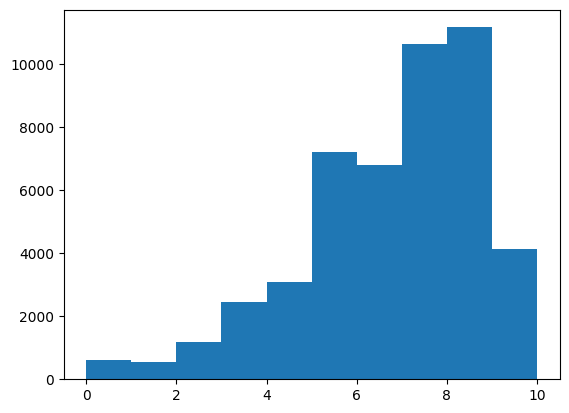

In [26]:
f = plt.figure()
plt.hist(df["cantril_ladder"])

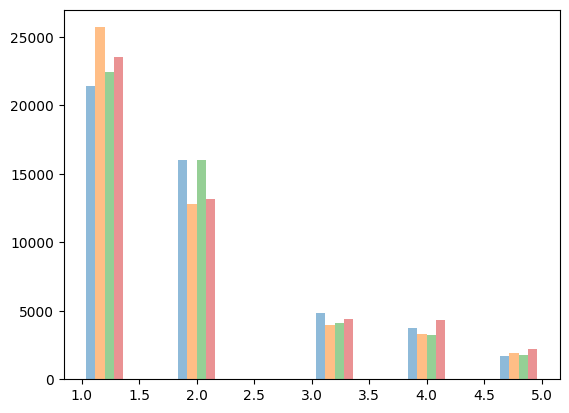

In [19]:
f = plt.figure()
plt.hist([df["phq4_1"],df["phq4_2"],df["phq4_3"],df["phq4_4"]] , alpha=0.5, label=["1","2","3","4"])
plt.show()

In [22]:
def count_occurences(cantril, phqz, type_of_phqz):
    helper = df[df[type_of_phqz].values == phqz]
    no = helper[helper["cantril_ladder"].values == cantril].shape[0]
    return no

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


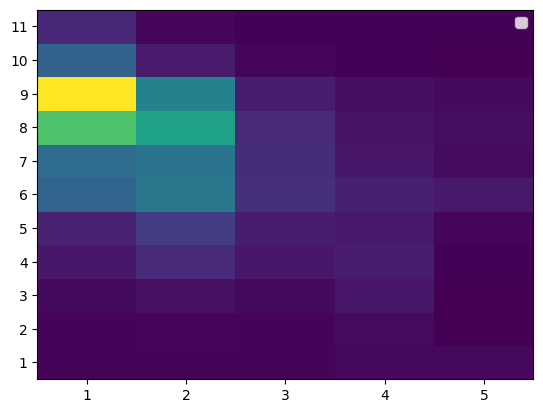

In [32]:
dfphq41 = pd.DataFrame(index=np.arange(11)+1, columns=np.arange(5)+1)

for index, row in dfphq41.iterrows():
    for i, ele in enumerate(row):
        ele = count_occurences(index-1, i+1, "phq4_1")
        dfphq41.iloc[[index-1],[i]] = float(ele)

dfphq41 = dfphq41.apply(pd.to_numeric)

plt.pcolor(dfphq41)
plt.yticks(np.arange(0.5, len(dfphq41.index), 1), dfphq41.index)
plt.xticks(np.arange(0.5, len(dfphq41.columns), 1), dfphq41.columns)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


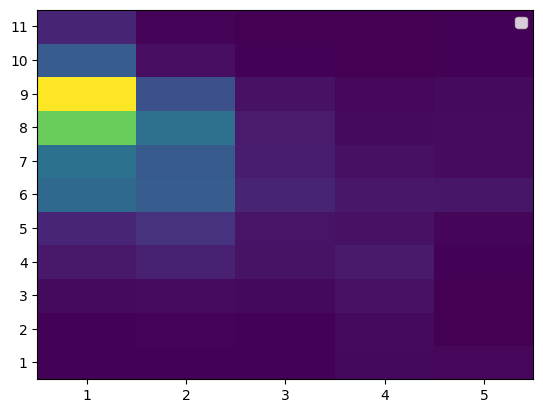

In [34]:
dfphq42 = pd.DataFrame(index=np.arange(11)+1, columns=np.arange(5)+1)

for index, row in dfphq42.iterrows():
    for i, ele in enumerate(row):
        ele = count_occurences(index-1, i+1, "phq4_2")
        dfphq42.iloc[[index-1],[i]] = float(ele)

dfphq42 = dfphq42.apply(pd.to_numeric)

plt.pcolor(dfphq42)
plt.yticks(np.arange(0.5, len(dfphq42.index), 1), dfphq42.index)
plt.xticks(np.arange(0.5, len(dfphq42.columns), 1), dfphq42.columns)
plt.legend()
plt.show()